In [45]:
import pandas as pd
import numpy as np

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.metrics import mean_squared_error,r2_score

# READING THE DATASET

In [14]:
df= pd.read_csv("C:/Users/jayna/Downloads/student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [15]:
list(df.columns)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

#### Attributes for student-mat.csv (Math course):
1 school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

2 sex - student’s sex (binary: ‘F’ - female or ‘M’ - male)

3 age - student’s age (numeric: from 15 to 22)

4 address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural)

5 famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3)

6 Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart)

7 Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

10 Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’)

11 reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’)

12 guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’)

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

These grades are related with the course subject, Math:
31 G1 - first period grade (numeric: from 0 to 20)

31 G2 - second period grade (numeric: from 0 to 20)

32 G3 - final grade (numeric: from 0 to 20, output target)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
print("Total Missing Values :",sum(df.isnull().sum()))

Total Missing Values : 0


Below plots explain that,
Most students belong to the Gabriel Peirera school.
Most students come under the age group of 15-18 with almost equal proportion of males and females,
Most students belong to family with size greater than or equal to 3.
Students coming from urban area is higher compared to rural area.
Cohabitation status of a student's parents is moslty together.

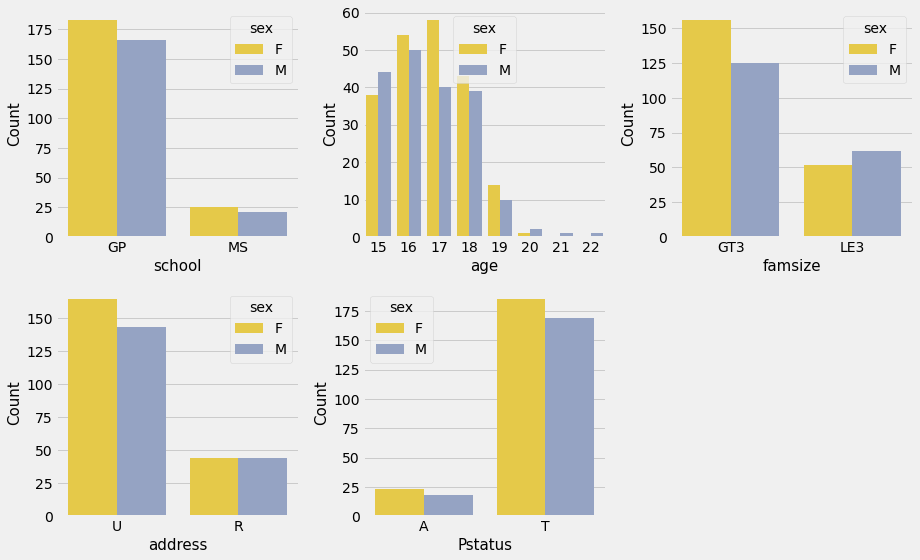

In [17]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['school','age','famsize','address','Pstatus']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(13,8)
    sns.countplot(x=col,data=df,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()

Let's explore a students's mother and father's job qualifications and how can these two factors affect student's grades

Below we observe plots for job qualifications of parents segregated on how much a student receives family support from parents. Be it financially or personally. We can conclude that for the Mother's job qualifications the other category has a considerabe amount of No's indicating that the students may not be receiving family support from mothers with job qualifications as 'other'.It maybe a low income job,such the parent is not able to provide her child the right amount of financial support for education or any other factor could be responsible for the student not getting adequate family educational support.

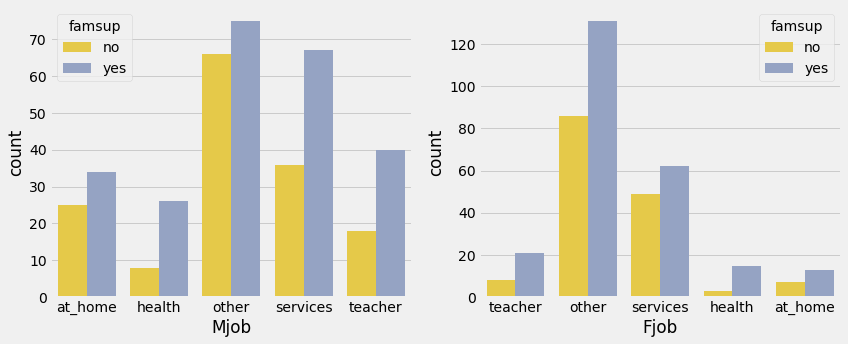

In [18]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sns.countplot(x=col,data=df,hue='famsup',palette='Set2_r')
    plt.tight_layout()

Below we observe that initially with students spending less time in travelling have a considerably higher studytime on an average over the week.Futher towards 3 hrs of travel time we see a drastic drop in study time of almost 10 hours on average each week where (1=10 hours). Surprisingly for 4 hrs of travelling time there is sudden increase in study time for the students. Reasons can be effective time management by students etc.

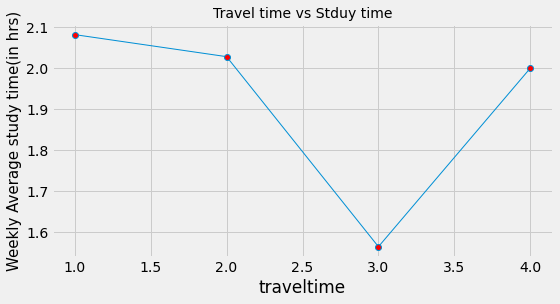

In [20]:
time=df.groupby('traveltime')['studytime'].mean().plot.line(figsize=(8,4),marker='o',markerfacecolor='red',linewidth=1)
plt.ylabel('Weekly Average study time(in hrs)',fontsize=15)
plt.title('Travel time vs Stduy time',fontsize=14)
plt.show()

Below is a line plot illustrating the distribution of study time of students vs their go out time. We notice that,initially,with low go out time the study time has seen a great inrement but as the go out time increases the study time has seen a derement from 2.1 (almost 20 hrs) to almost 1.8 (10-15hrs).

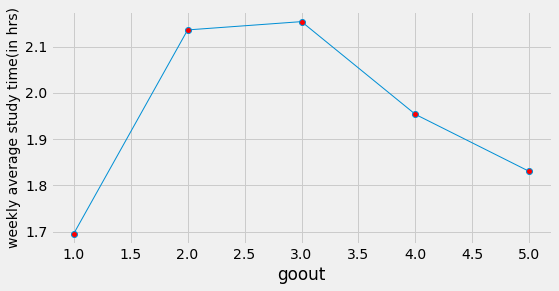

In [21]:
out=df.groupby('goout')['studytime'].mean().plot.line(figsize=(8,4),
                                                      marker='o',
                                                      markerfacecolor='red',
                                                      linewidth=1)
plt.ylabel('weekly average study time(in hrs)',fontsize=14)
plt.show()

Let's see if we can gain information thorugh internet accessibility for a particular student


Below line plots show the distribution of students grades G1 and G2 over their weekly avg study time. Moreover how does internet usage affect the grades can also be concluded through the plots. For both grades we can observe that with no internet accessibility and low study hours the students grades are poor.But on the contrary although the student studies for less time the grades obtained is comparatively better for those who have internet accessibility.Lastly with increasing study time no internet students show a drastic improvemnet in marks while those with internet and good study hours are able to make slight imporvements in their grades for G2 and slight derement in grades for G1.Reasons: students with internet can waste time while those without it can concentrate properly on their studies. It depends on how effectively a student uses the internet for hie/her studies.

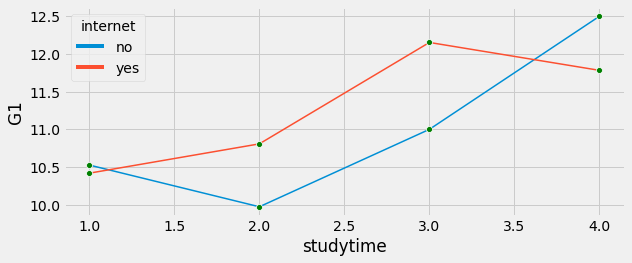

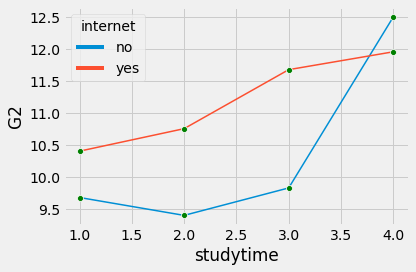

In [22]:
grades=['G1','G2']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=df.groupby(['internet','studytime'])[col].mean()
    x=x.reset_index('studytime')
    
    sns.lineplot(x='studytime',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()
    plt.show()

Let's see which factors lead to an increase in a student's daily and weekly alcohol consumption.

Below barplots illustrate the Daily and weekly alcohol consumption of students and its distribution over how frequently students go out with friends.For obvious reasons we see an increase in alcohol consumption as a result of spending more time outdoors with friends.This in turn could lead to overall degradation of health of the students.


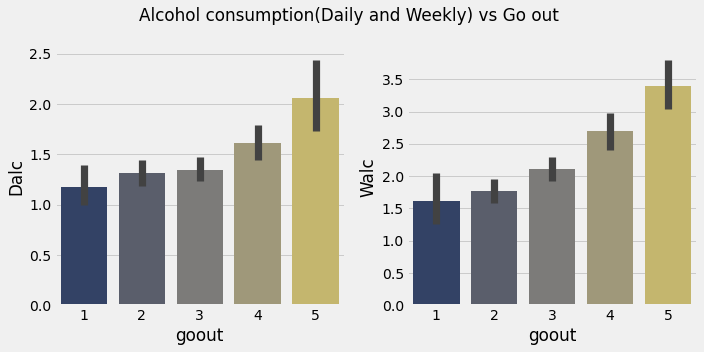

In [24]:
cols=['Dalc','Walc']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(10,5)
    
    sns.barplot(x='goout',y=col,data=df,palette='cividis')
    plt.tight_layout()
    plt.suptitle('Alcohol consumption(Daily and Weekly) vs Go out ')

Analysis of alcohol consumption and its effect on student's grade

Below line plots illustrate how daily alcohol consumptions affect tha grades of students. Prominently students with average to good health have avearge to better grades even with a considerable increase in their alcohol consumption. But one thing to notice is that students with extremely poor health initially have achieved good grades, but with an increase in alcohol consumption their grades have drastically deteriorated taken into account their poor health and increased alcohol intake.

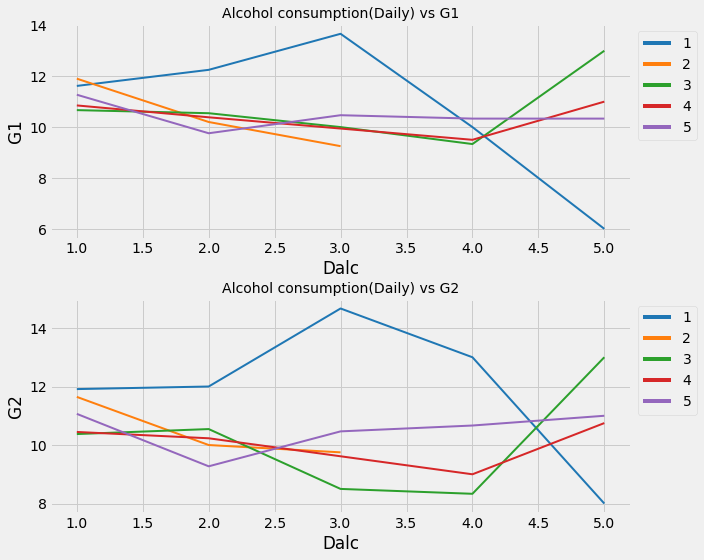

In [25]:
cols=['G1','G2']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(10,8)
    
    health=df.groupby(['Dalc','health'])[col].mean()
    health=health.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=health.index,
                 data=health,palette='tab10',linewidth=2)
    plt.tight_layout()
    plt.title(f'Alcohol consumption(Daily) vs {col}',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))

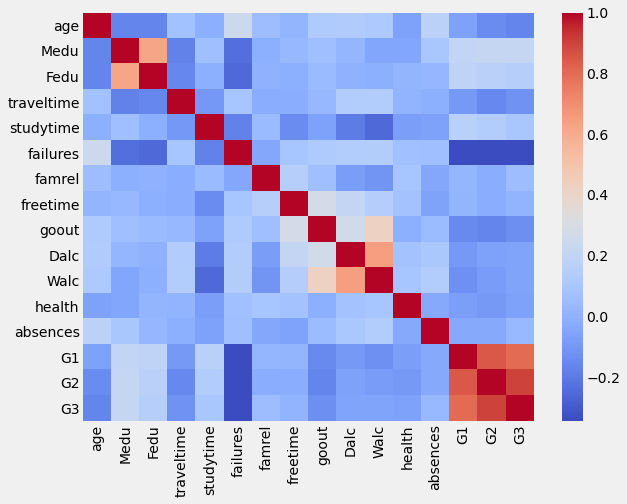

In [27]:
plt.figure(figsize=(9,7))
corr=df.corr()
sns.heatmap(corr,robust=True,cmap='coolwarm')
plt.show()

In [28]:
skew=pd.DataFrame(df.skew().sort_values(ascending=False))
skew.style.background_gradient(cmap='Blues')

,0
absences,3.671579
failures,2.387026
Dalc,2.190762
traveltime,1.607029
studytime,0.632142
Walc,0.611960
age,0.466270
G1,0.240613
goout,0.116502
Fedu,-0.031672


# Analyzing histograms for continuous features

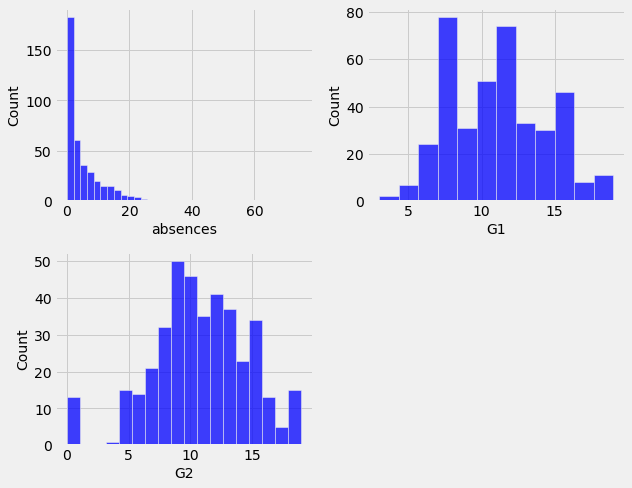

In [30]:
cols=['absences','G1','G2']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(2,2,i+1)
    fig.set_size_inches(9,7)
    
    sns.histplot(x=col,data=df,color='blue')
    
    plt.ylabel('Count',fontsize=14)
    plt.xlabel(col,fontsize=14)
    plt.tight_layout()

# Categorical columns

In [31]:
cat_cols=df.select_dtypes('object')
cat_cols

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,other,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,other,no,no,no,no,no,yes,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,no,no,yes,yes,no


In [32]:
X=df.drop('G3',axis=1)
y=df.G3

# Splitting the data

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
for col in cat_cols:
    le=LabelEncoder()
    X_train[col]=le.fit_transform(X_train[col])
    X_test[col]=le.transform(X_test[col])

<ipython-input-34-91b429d99279>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col]=le.fit_transform(X_train[col])
<ipython-input-34-91b429d99279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col]=le.transform(X_test[col])


In [35]:
selector=SelectKBest(mutual_info_regression,k=30)
X_train=pd.DataFrame(selector.fit_transform(X_train,y_train))
X_test=pd.DataFrame(selector.transform(X_test))

In [43]:
def score(model):
    modell=model()
    print('Model:',model)
    print('-'*20)
    modell.fit(X_train,y_train)
    preds=modell.predict(X_test)
    
    print("RMSE :",np.sqrt(mean_squared_error(y_test,preds)))
    print('r2_score:',r2_score(y_test,preds))
    
    plt.figure(figsize=(7,6))
    plt.scatter(x=y_test,y=preds,color='red')
    plt.title('Actuals vs Predictions',fontsize=14)
    plt.xlabel('Actuals',fontsize=14)
    plt.ylabel('predictions',fontsize=14)
   

Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
--------------------
RMSE : 2.503778656955365
r2_score: 0.7148171468222353


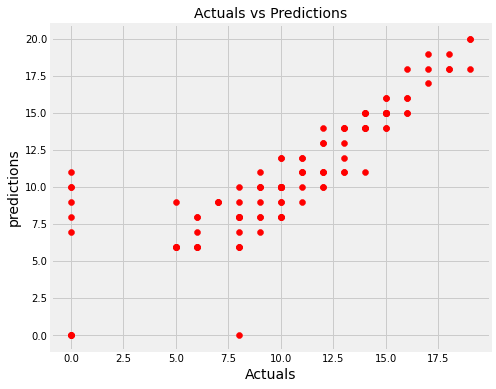

AttributeError: 'function' object has no attribute 'show'

In [50]:
score(DecisionTreeRegressor)


Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
--------------------
RMSE : 2.503778656955365
r2_score: 0.7148171468222353


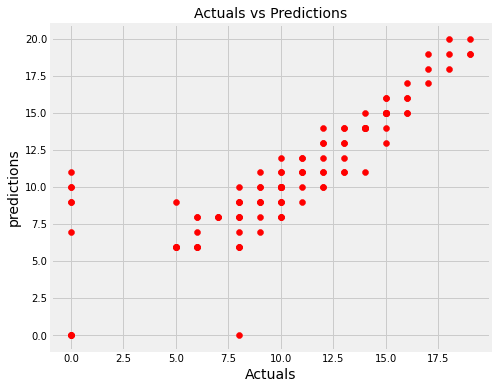

In [47]:
score(DecisionTreeRegressor)


Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
--------------------
RMSE : 1.7694235399885314
r2_score: 0.8575720756983887


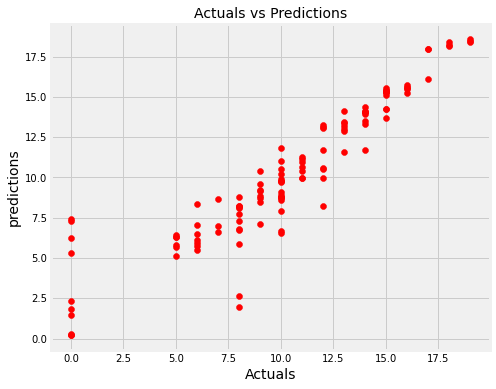

In [51]:
score(RandomForestRegressor)

Model: <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>
--------------------
RMSE : 2.0341647634580564
r2_score: 0.8117635179628216


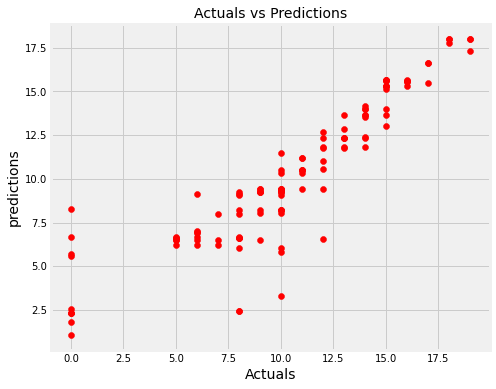

In [56]:
score(AdaBoostRegressor)

Model: <class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
--------------------
RMSE : 1.8434335598986658
r2_score: 0.84540817548283


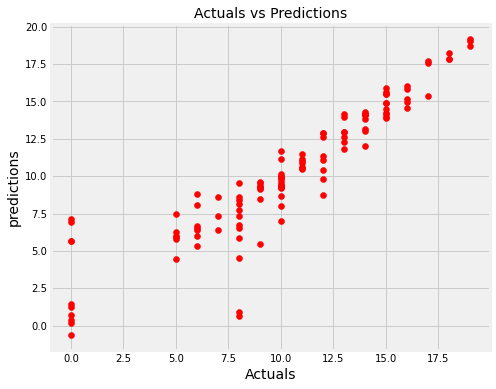

In [57]:
score(GradientBoostingRegressor)

From above we confirm that Random forest regressor has the least RMSE followed be GradientBoosting Regressor